<a href="https://colab.research.google.com/github/aruanalucena/Projeto_Ecommerce_/blob/main/Ecommerce_An%C3%A1lise_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)

# <font color='arrow'>**Quem sou eu na fila do pão!**
>Meu nome é **Aruanã Cortez**, sou Cientista de Dados. Sempre tive gosto pela área de tecnologia, tem 2 anos  comecei a aprender sobre programação, ciência de dados e etc.
* Procuro colocação em startups e companhias no exterior, principalmente na Alemanha e Holanda. Paixão por desafios e Machine Learning , IA e IoT são áreas que tenho muito interesse e me desenvolver e projetos.Tenho conhecimento de Métodos Ageis , versionamento e  trabalho remoto.
### <font color='arrows'>**Onde encontrar meu trabalho?**
1. [Site](https://www.aruanacortezdev.com.br);
2. [Github](https://https://github.com/aruanalucena) .
3. [Medium](https://medium.com/me/stories/public)
4. [Twitter](https://twitter.com/@AruanaCortez)

# <font color='grey'>**Sobre o que é meu projeto?**</font>

Neste trabalho iremos analisar a base de dados disponibilizada _**online pela Olist**_.

***

Esta base refere-se ao desenvolvimento do comércio eletrônico no Brasil nos últimos anos, apresentando informações tanto das compras realizadas, quanto dos clientes que as fizeram, dos vendedores envolvidos e dos produtos comercializado neste tempo.



***
**Alvos de estudo**:
1. <font color='green'>**NLP|Processamento Linguagem Natural**</font> Desenvolver analise dos textos de avaliação e suas diversas dimensões.
2.<font color='green'>**CLUSTERING|AGRUPAMENTO**</font> Agrupar exemplo clientes que não escreveram um comentario.Porquê? satisfeito ou  o que ?
3. <font color='green'>**SALES PREDICTION|PREVER VENDAS**</font> Com dados da data de compra prever vendas futuras.
4.<font color='green'>**PRODUCT QUALITY|QUALIDADE DO PRODUTO**</font> Categorias que causam mais insatisfação do Cliente.
5.<font color='green'>**FEATURE ENGINEERING|ENGENHARIA DE RECURSOS**</font>Anexar informações publicas a ele ou criar recusrsos a partir dos dados.
***

**Objetivos**:
Meu  objetivo é explorar esta base de dados para tirar informações relevantes para serem utilizadas nos negócios, culminando com uma segmentação dos clientes, onde estes possam ser classificados de acordo com sua assiduidade às compras online.


* **OBS :** Vou procurar aplicar todas as técnicas que recebi no Curso dos instrutores, mentores e equipe da AWARI.

# Guia para o notebook:
<font color='Orange'> >> </font> Textos precedidos de sinais na cor <font color='Orange'> **Laranja** </font> são **comentários gerais** feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> **Vermelha** </font> são questionamentos que **tentarei responder**. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> **Azul** </font> são **respostas e hipóteses levantadas por mim** para responder aos questionamentos anteriores.<br>
<font color='Green'> >> </font> Textos precedidos de sinais na cor <font color='Green'> **Verde** </font> Demonstro  **conceitos**.

# <font color='grey'>**Qual a diferença entre dados primarios e secundários?**</font>
* Estes diferem principalmente em termos do objetivo da coleta de **dados**. Se os dados coletados são originais e são coletados pela primeira vez por um pesquisador ou investigador, se trata de **dados primários**. Por outro lado, se os dados são coletados usando fontes já disponíveis, são **dados secundários**.
* [Fonte](https://www.questionpro.com/)

# <font color='grey'>**Sobre o que é meu projeto?**</font>

Neste trabalho iremos analisar a base de dados disponibilizada _**online pela Olist**_.

***

Esta base refere-se ao desenvolvimento do comércio eletrônico no Brasil nos últimos anos, apresentando informações tanto das compras realizadas, quanto dos clientes que as fizeram, dos vendedores envolvidos e dos produtos comercializado neste tempo.Então nossos dados são secundários.



***


### <font color='Orange'> >> **Análise dos Reviews**</font>

## 1) Introdução

Uma importante abordagem ao trabalhar com análise de dados de uma base comercial é justamente o feedback dos consumidores no que diz respeito à qualidade dos produtos, ao atendimento, etc. e neste sentido é de suma importância ter uma base de dados que tenham essas informações, uma vez que elas ajudam a melhorar a qualidade do serviço.

Aqui não é diferente e neste notebook trabalharemos com uma base contendo, entre outros, os reviews dos clientes acerca dos produtos e uma nota atribuida a ele. Assim, utilizaremos alguns algorítmos de Processamento de Linguagem Natural (em inglês NLP) para fazer um classificador de sentimento, ou seja, determinar se um determinado review é positivo ou negativo.

Portanto, a partir da próxima seção iremos dar início a esta etapa do estudo.

### <font color='Orange'> >> **2) Carregando e explorando os dados**</font> 

In [1]:

# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Carregando a base de dados

reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [4]:

# Visualizando o cabeçalho
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
# Verificando o shape do dataframe
reviews.shape

(100000, 7)


### <font color='Orange'> >> Devido ao tamanho muito grande do dataset, iremos pegar apenas </font><br>uma amostra do mesmo para reduzir os custos computacionais, que neste <br>caso é significativo.

* Por conveniência, iremos considerar 40% dos dados originais.

In [6]:
# Gerando amostra do dataset
reviews_sample = reviews.sample(frac=0.4, random_state=2)

# Mostrando novo dataset
reviews_sample.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
6448,65e87641e147cd476cb45db794709d96,1e6eb05de9f71dd42f9ef81813dce355,5,NaN,Produto entregue antes do prazo. Serviço e pro...,2017-04-19 00:00:00,2017-04-19 21:39:51
50680,81cc7b52760844d20c4afeab2c71834c,934d3985d22709473850e6e644a19fea,5,NaN,NaN,2018-01-27 00:00:00,2018-01-30 13:14:50
814,397f27a0d2936d02d3447864e0398414,8f15948ef0bdb4709a5801084a564c56,3,NaN,"ótima compra\r\nmas o frete nao compensa,pesa ...",2017-10-20 00:00:00,2017-10-23 18:49:42
20354,5835427026f36ce691ad96313bddfe91,61b199f09f9de7776b875cce7c71e649,5,NaN,NaN,2018-05-04 00:00:00,2018-05-04 10:44:20
49224,7751f2853341c4c59f589164fc02898c,97c5a4acc0915c5bd17e5a3256693ef6,1,Produto veio com defeito,"Produto veio com defeito não funciona, bem vou...",2018-06-27 00:00:00,2018-06-29 19:39:14


In [7]:

# Visualizando o shape
reviews_sample.shape

(40000, 7)

In [8]:

# Retornando informações sobre o dataframe
reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 6448 to 12739
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                40000 non-null  object
 1   order_id                 40000 non-null  object
 2   review_score             40000 non-null  int64 
 3   review_comment_title     4683 non-null   object
 4   review_comment_message   16551 non-null  object
 5   review_creation_date     40000 non-null  object
 6   review_answer_timestamp  40000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [9]:

# Retornando algumas estatísticas
reviews_sample.describe()

,review_score
count,40000.000000
mean,4.076650
std,1.361533
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Verificando valores faltantes
reviews_sample.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       35317
review_comment_message     23449
review_creation_date           0
review_answer_timestamp        0
dtype: int64

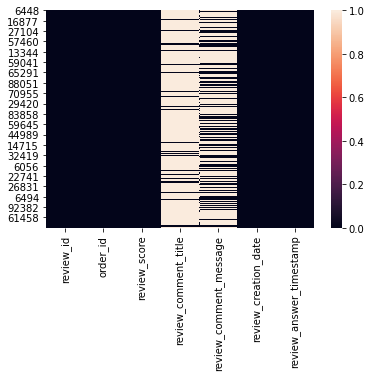

In [11]:
# Visualizando valores faltantes com heatmap

sns.heatmap(data=reviews_sample.isnull());


### <font color='Orange'> >> **Confirmamos que há uma grande quantidade de valores faltantes**.</font>

In [12]:

# Visualizando alguns comentários
reviews_sample['review_comment_message']

6448     Produto entregue antes do prazo. Serviço e pro...
50680                                                  NaN
814      ótima compra\r\nmas o frete nao compensa,pesa ...
20354                                                  NaN
49224    Produto veio com defeito não funciona, bem vou...
                               ...                        
34197    Já paguei faz tempo, estou precisando é ainda ...
57789                                                  NaN
96663    Entrega recebida bem antestreia do prazo estab...
92710      Ainda não usei o produto mas tudo foi certinho 
12739                                                  NaN
Name: review_comment_message, Length: 40000, dtype: object

In [13]:

# Visualizando alguns títulos dos comentários
reviews_sample['review_comment_title'].unique()

array([nan, 'Produto veio com defeito', 'Super recomendo', ...,
       'Rápido e eficiente', 'Produto entregue em parte',
       'Produto diferente '], dtype=object)

In [14]:

# Número de títulos não únicos
reviews_sample['review_comment_title'].nunique()

2129

In [15]:

# Contagem dos scores
reviews_sample['review_score'].value_counts()

5    23150
4     7565
1     4776
3     3262
2     1247
Name: review_score, dtype: int64

###  <font color='Orange'> >> Podemos ainda fazer um histograma para verificar a ocorrência dos scores. </font>

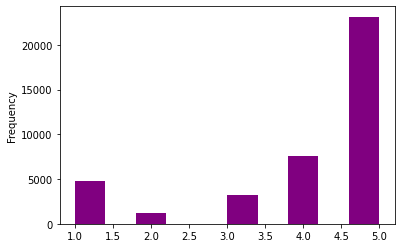

In [16]:
# # Plotando histograma
reviews_sample['review_score'].plot(kind='hist', color='purple');


### <font color='red'> >> Adicionando coluna para classificação </font> 

No dataframe reviews temos a coluna "review_score" que representa as notas (de 1 a 5) para os serviços oferecidos.<br> Neste caso, como queremos criar um classificador binário para os comentários (positivos e negativos) devemos então gerar esta <br>classificação baseado no score dado para cada comentário.<br> Assim, tomaremos o seguinte critério:

* scores 1, 2 e 3: comentário negativo = 0;
* scores 4 e 5: comentário positivo = 1.

Desta forma, adicionaremos a coluna "feedback" com a respectiva classificação para cada comentário.

In [17]:
# Adicionando a coluna "feedback"
reviews_sample['feedback'] = reviews_sample['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [18]:
# Verificando o dataframe com a nova coluna
reviews_sample

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,feedback
6448,65e87641e147cd476cb45db794709d96,1e6eb05de9f71dd42f9ef81813dce355,5,NaN,Produto entregue antes do prazo. Serviço e pro...,2017-04-19 00:00:00,2017-04-19 21:39:51,1
50680,81cc7b52760844d20c4afeab2c71834c,934d3985d22709473850e6e644a19fea,5,NaN,NaN,2018-01-27 00:00:00,2018-01-30 13:14:50,1
814,397f27a0d2936d02d3447864e0398414,8f15948ef0bdb4709a5801084a564c56,3,NaN,"ótima compra\r\nmas o frete nao compensa,pesa ...",2017-10-20 00:00:00,2017-10-23 18:49:42,0
20354,5835427026f36ce691ad96313bddfe91,61b199f09f9de7776b875cce7c71e649,5,NaN,NaN,2018-05-04 00:00:00,2018-05-04 10:44:20,1
49224,7751f2853341c4c59f589164fc02898c,97c5a4acc0915c5bd17e5a3256693ef6,1,Produto veio com defeito,"Produto veio com defeito não funciona, bem vou...",2018-06-27 00:00:00,2018-06-29 19:39:14,0
...,...,...,...,...,...,...,...,...
34197,ae0c4bea81f7dda866bd1ba12d235213,39d0bd05538b0d573193744390e86223,1,NaN,"Já paguei faz tempo, estou precisando é ainda ...",2018-03-24 00:00:00,2018-03-24 11:04:49,0
57789,c4e29cfc5265e1b2200f063ab60405a7,cecc450aed233004e69538a4ce7f7f37,5,NaN,NaN,2017-05-27 00:00:00,2017-05-30 10:46:00,1
96663,3be4d9828f24b3567084677feff43908,865301eccebb37c03ad8ccd1cb994b2b,5,NaN,Entrega recebida bem antestreia do prazo estab...,2018-04-19 00:00:00,2018-04-21 22:37:50,1
92710,a5e4ad45d1d943c92d14fd0193e8d752,35580ca9f2a84299b3b6c41875ba71a7,5,NaN,Ainda não usei o produto mas tudo foi certinho,2018-04-07 00:00:00,2018-04-08 01:03:13,1


### <font color='red'> >> Agora precisamos eliminar as colunas do dataframe que não serão utilizadas. <br>Logo, deixaremos apenas as colunas "review_comment_message" e "feedback".</font>

In [19]:
# Deletando colunas desnecessárias
reviews_sample = reviews_sample.drop(columns=['review_id', 'order_id', 'review_score', 
                                'review_comment_title', 'review_creation_date',	
                                'review_answer_timestamp'], axis=1)

# Deletando registros com valores faltantes
reviews_sample.dropna(inplace=True)

# Reindexando os registros
reviews_sample = reviews_sample.reset_index()

# Removendo a coluna index
reviews_sample.drop(columns='index', inplace=True, axis=1)

# Visualizando o cabeçalho
reviews_sample.head()

,review_comment_message,feedback
0,Produto entregue antes do prazo. Serviço e pro...,1
1,"ótima compra\r\nmas o frete nao compensa,pesa ...",0
2,"Produto veio com defeito não funciona, bem vou...",0
3,satisfeita com a compra realizada.,1
4,OBRIGADA PELO ATENDIMENTO!,1


In [20]:
# Visualizando o novo shape do dataframe
reviews_sample.shape

(16551, 2)


### <font color='red'> >> Podemos confirmar que o novo dataframe não tem valores faltantes pelo heatmap.</font>

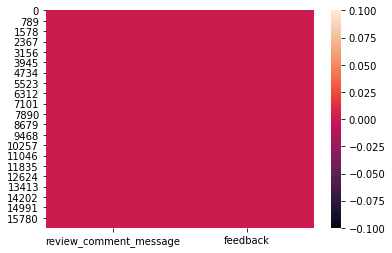

In [21]:
# Heatmap
sns.heatmap(data=reviews_sample.isnull());

In [22]:
reviews_sample.isnull().sum()

review_comment_message    0
feedback                  0
dtype: int64

### <font color='red'> >> Podemos plotar um histograma da coluna "feedback".</font>

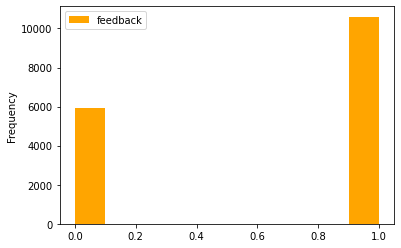

In [23]:
reviews_sample.plot(kind='hist', color='orange');


### <font color='blue'> >> Podemos ainda adicionar mais uma estatística para entendermos melhor os nossos dados.</font><br> Neste caso, iremos verificar qual é, em média, o número de caracteres de cada comentário.<br> Criaremos então, outro dataframe para este fim.

In [24]:
# Criação do novo dataframe
reviews_character_length = reviews_sample.copy() 

# Criando a coluna com o número de caracteres
reviews_character_length['length'] = reviews_sample['review_comment_message'].apply(len)

In [25]:
# Visualizando o cabeçalho
reviews_character_length

,review_comment_message,feedback,length
0,Produto entregue antes do prazo. Serviço e pro...,1,78
1,"ótima compra\r\nmas o frete nao compensa,pesa ...",0,83
2,"Produto veio com defeito não funciona, bem vou...",0,137
3,satisfeita com a compra realizada.,1,34
4,OBRIGADA PELO ATENDIMENTO!,1,26
...,...,...,...
16546,"Eu não recebi o xale do sofá, porém ao ligar, ...",0,67
16547,Amei!\r\nSão lindos e de ótima qualidade!,1,39
16548,"Já paguei faz tempo, estou precisando é ainda ...",0,69
16549,Entrega recebida bem antestreia do prazo estab...,1,53


In [26]:
# Estatísticas de reviews_character_length
reviews_character_length.describe()

,feedback,length
count,16551.000000,16551.000000
mean,0.640445,70.568244
std,0.479885,55.347758
min,0.000000,1.000000
25%,0.000000,29.000000
50%,1.000000,54.000000
75%,1.000000,98.000000
max,1.000000,204.000000


In [27]:
# Checando alguns reviews
reviews_character_length.query('length == 1')

,review_comment_message,feedback,length
125,.,1,1
292,.,1,1
557,.,1,1
756,S,0,1
956,s,1,1
1811,I,1,1
2114,.,1,1
2437,.,1,1
2508,s,1,1
2566,.,0,1


In [28]:
# Verificando a quantidade de caracteres únicos
reviews_character_length.query('length == 1')['review_comment_message'].value_counts()

.    23
-     3
5     2
s     2
*     2
o     2
😀     1
O     1
A     1
👍     1
?     1
X     1
S     1
Y     1
I     1
m     1
Name: review_comment_message, dtype: int64

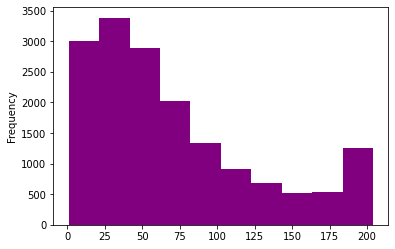

In [29]:
# Histograma para o tamanho dos reviews
reviews_character_length['length'].plot(kind='hist', color='purple');

### <font color='Orange'> >> Reviews positivos e negativos</font><br>
* Iremos agora gerar dataframes com reviews positivos e negativos e comparar ambos.

In [30]:
# Dataframe negativo
negative = reviews_character_length.query('feedback == 0')
negative.head()

,review_comment_message,feedback,length
1,"ótima compra\r\nmas o frete nao compensa,pesa ...",0,83
2,"Produto veio com defeito não funciona, bem vou...",0,137
5,"No site consta como entregue, porém NÃO recebi...",0,52
6,Comprei como srmpre faço. Porém dessa vez o pr...,0,131
7,O produto não foi entregue. Nem se quer chegou...,0,56


In [31]:
# Shape
negative.shape

(5951, 3)

In [32]:
# Visualizando estatística
negative.describe()

,feedback,length
count,5951.0,5951.000000
mean,0.0,98.157957
std,0.0,61.112536
min,0.0,1.000000
25%,0.0,46.000000
50%,0.0,87.000000
75%,0.0,151.000000
max,0.0,204.000000


In [33]:
# Dataframe positivo
positive = reviews_character_length.query('feedback == 1')
positive.head()

,review_comment_message,feedback,length
0,Produto entregue antes do prazo. Serviço e pro...,1,78
3,satisfeita com a compra realizada.,1,34
4,OBRIGADA PELO ATENDIMENTO!,1,26
8,"Atendimento especial,adorei comprar nas lojas ...",1,139
9,Muito bom,1,9


In [34]:

# Shape
positive.shape

(10600, 3)

In [35]:
# Visualizando estatística
positive.describe()

,feedback,length
count,10600.0,10600.000000
mean,1.0,55.078962
std,0.0,44.938285
min,1.0,1.000000
25%,1.0,23.000000
50%,1.0,43.000000
75%,1.0,73.000000
max,1.0,204.000000


### <font color='Orange'> >> Veremos que os comentários negativos é, em média, maior do que os positivos e um motivo<br> plausível é a possibilidade de as pessoas com queixas do serviço explicarem <br>mais detalhadamente sua insatisfação.</font>

### <font color='red'> >> Nuvem de palavras</font>

* Agora, criaremos duas nuvens de palavra para cada dataframe (positivo e negativo) para entendermos quais palavras mais se destacam em ambos os casos. <br>Para isso, devemos colocar todos os reviews como se fosse uma string apenas. <BR>Então, temos o seguinte código com este propósito.

Reviews positivos

In [36]:
# Colocando reviews positivos em uma lista
positive_reviews = positive['review_comment_message'].tolist()

# Visualizando os 5 primeiros reviews
positive_reviews[0:5]

['Produto entregue antes do prazo. Serviço e produto 100% atendidos. Parabéns!!!',
 'satisfeita com a compra realizada.',
 'OBRIGADA PELO ATENDIMENTO!',
 'Atendimento especial,adorei comprar nas lojas lannister pelo site o produto veio correto.Parabéns pelo desempenho.Sou um cliente satisfeito',
 'Muito bom']

In [37]:

# Juntando em apenas uma string
sentence_as_one_string = ' '.join(positive_reviews)

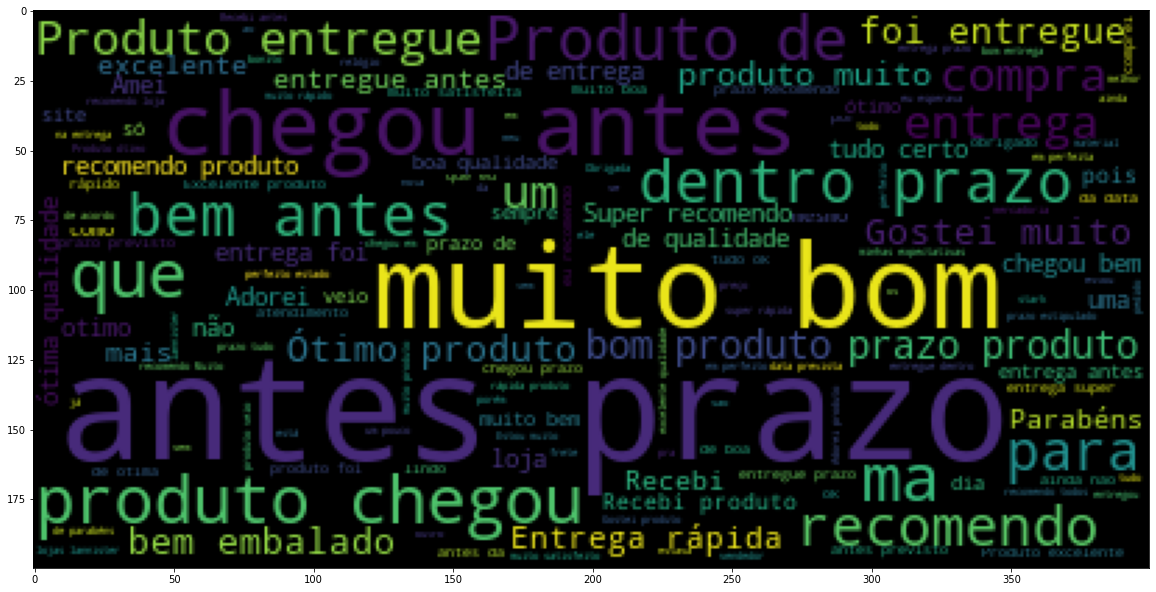

In [38]:
# Importando a biblioteca
from wordcloud import WordCloud

# Gerando a imagem
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one_string));

* Reviews negativos

In [39]:

# Colocando reviews negativos em uma lista
negative_reviews = negative['review_comment_message'].tolist()

# Visualizando os 5 primeiros reviews
negative_reviews[0:5]

['ótima compra\r\nmas o frete nao compensa,pesa no orçamento.\r\ndevia ter frete grates\r\n',
 'Produto veio com defeito não funciona, bem vou pedir troca, o preço não vale a dor de cabeça, fui em uma elétrica e comprei um prestasse.',
 'No site consta como entregue, porém NÃO recebi nada.',
 'Comprei como srmpre faço. Porém dessa vez o produto ficou retido no correio de outro município e não entre em casa como de costume.',
 'O produto não foi entregue. Nem se quer chegou em casa. ']

In [40]:
# Juntando em apenas uma string
negative_sentence_as_one_string = ' '.join(negative_reviews)

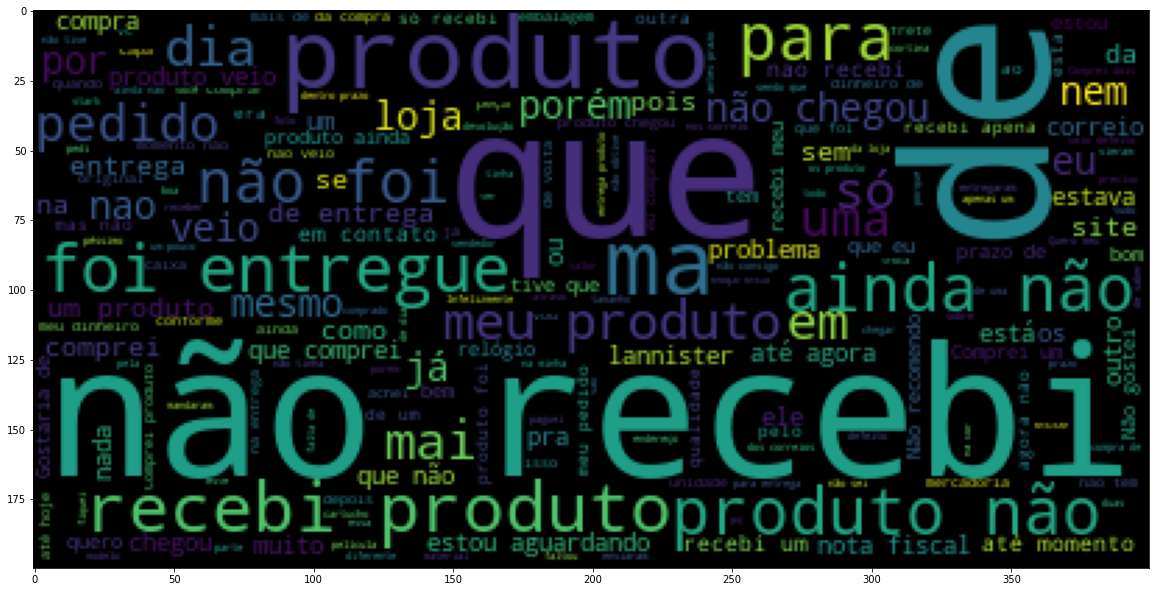

In [41]:
# Gerando a imagem
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string));


### <font color='blue'> >> Remoção de pontuação</font> 

Para criar o modelo preditivo de sentimento precisamos tratar os dados (da coluna reviews) e o tratamento neste caso consiste na remoção de pontuação e das chamadas "stop words". <br>Inicialmente iremos tratar a pontuação para, na próxima seção, tratar as stop words.

In [42]:

# Importando a bibliotecas
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### <font color='blue'> >> Podemos fazer um teste com um review para termos certeza que o código servirá para nosso propósito.</font>

In [43]:

# Selecionando um review qualquer do dataframe
test = reviews_sample['review_comment_message'].iloc[200]
test

'No prazo, como sempre!!!!!!!'

In [44]:

test_punct = [letra for letra in test if letra not in string.punctuation]
print(test_punct)

['N', 'o', ' ', 'p', 'r', 'a', 'z', 'o', ' ', 'c', 'o', 'm', 'o', ' ', 's', 'e', 'm', 'p', 'r', 'e']


### <font color='blue'> >> Note que removemos a pontuação do review original. Agora, podemos juntá-lo novamente em uma frase sem tais pontuações.</font>

In [45]:

# Juntando novamente a frase
test_punct = ''.join(test_punct)
print(test_punct)

No prazo como sempre


### <font color='blue'> >> Remoção de stop words</font>¶
Agora iremos remover as stop words, ou seja, aquelas palavras que não contruibuem para o significado positivou ou negativo dos reviews.

In [46]:
# Importando a biblioteca
import nltk

In [47]:
# Fazendo download de alguns pacotes
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### <font color='blue'> >> Como os textos estão em português, precisamos baixar as stop words no mesmo idioma e para isso importaremos uma biblioteca específica do pacote nltk.</font>

In [48]:
# Importando bibliotecas
from nltk.corpus import stopwords

# Stop words em português
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [49]:
# Verificando a quantidade de stop words
len(stopwords.words('portuguese'))

204


### <font color='blue'> >> Podemos agora testar a remoção de stop words para o review de teste que criamos acima.</font>

In [50]:
# Removendo stopwords do review de teste
test_punct = [word for word in test_punct.split() if word.lower() not in stopwords.words('portuguese')]

In [51]:
# Verificando o resultado
test_punct

['prazo', 'sempre']


### <font color='green'> >> Count vectorization (tokenização)</font> 

* Nesta seção faremos o processo de tokeniação, ou seja, iremos converter cada palavras em números e fazer uma contagem de cada uma delas para verifica sua ocorrência em uma frase.

In [52]:
# Importando a biblioteca
from sklearn.feature_extraction.text import CountVectorizer


* Ulitilizando a frase de testes acima para verificação.

In [53]:
# Criando um objeto para vetorização
vectorizer = CountVectorizer()

# Aplicando à frase de testes
x = vectorizer.fit_transform(test_punct)

In [54]:

# Verificando o resultado
x

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [55]:
# Verificando as palavras vetorizadas
vectorizer.get_feature_names()

['prazo', 'sempre']

In [56]:
# Visualizando a matriz resultante
x.toarray()

array([[1, 0],
       [0, 1]])

### <font color='Orange'> >> Pipeline para limpeza de dados¶</font>
* Agora sim iremos aplicar os códigos escritos acima para toda a base de dados.

In [57]:
# Criando a função
def message_cleaning(message):
  # text = re.sub(r'\.+', ' ', message)
  text = [char for char in message if char not in string.punctuation]
  text = ''.join(text)
  text = [word for word in text.split() if word.lower() not in stopwords.words('portuguese')]
  return text

In [58]:
# Aplicando a função no dataframe
reviews_df_clean = reviews_sample['review_comment_message'].apply(message_cleaning)

In [59]:

# Visualizando o dataframe
reviews_df_clean

0        [Produto, entregue, antes, prazo, Serviço, pro...
1        [ótima, compra, frete, nao, compensapesa, orça...
2        [Produto, veio, defeito, funciona, bem, vou, p...
3                          [satisfeita, compra, realizada]
4                                  [OBRIGADA, ATENDIMENTO]
                               ...                        
16546    [recebi, xale, sofá, porém, ligar, consta, rec...
16547                     [Amei, lindos, ótima, qualidade]
16548    [paguei, faz, tempo, precisando, ainda, recebi...
16549    [Entrega, recebida, bem, antestreia, prazo, es...
16550               [Ainda, usei, produto, tudo, certinho]
Name: review_comment_message, Length: 16551, dtype: object

In [60]:
# Fazendo a vectorização
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_sample['review_comment_message'])

In [61]:
# Vendo as palavras únicas
print(vectorizer.get_feature_names())

['0', '00', '000000000000000000000000000', '000024453', '001689', '003566', '003570', '01', '01032018', '0106', '01062017', '0109', '010918', '01092017', '01122017', '012495', '0162017', '0163750232', '0163751255', '0164784672', '0165096389', '0165465041', '0166709005', '0166821151neste', '0168759427', '01um', '02', '0201', '020218', '02032018', '020617', '02082018', '02645364747', '02649450934', '02653047820', '02654859320', '02655871733', '02657469076', '02657530904', '02658697704', '02664287063', '02666377620', '03', '03012018', '03022018', '0303', '03032018', '0304', '03042017', '0305', '0307', '031117', '03497913106', '04', '0401', '0404', '0405', '04102016', '041217', '05', '0501', '05022018', '0503', '0504', '050717', '05092017', '0511', '05ml', '06', '060118', '06022018', '0603', '0604', '06042018', '0606', '060618', '06062018', '06072018', '0608', '060818', '06082018', '060cm', '0612', '062018', '07', '0702', '0705', '07052018Só', '0706', '07092018', '0712', '071217', '0712201

In [62]:
# Contagem de palavras únicas
len(vectorizer.get_feature_names())

13858

In [63]:
# Visualizando shape
reviews_countvectorizer.shape

(16551, 13858)


### <font color='Orange'> >> Temos que gerar um dataframe final contendo os dados de reviews_coutvectorizer e a coluna "feedback".</font><br> Para isso ocorrer, seguiremos os seguintes passos

1) Deletaremos a coluna "review_comment_message" do dataframe reviews_sample.

2) Criaremos um dataframe com os valores de "reviews_countvectorizer".

3) Concatenaremos reviews_sample com o dataframe criado no passo 2.

In [64]:
# Deletando a coluna "review_comment_message" 
reviews_sample.drop(columns='review_comment_message', axis=1, inplace=True)

# Criando dataframe para valores tokenizados
countvectorizer_df = pd.DataFrame(reviews_countvectorizer.toarray())

# Concatenando os dataframes acime
reviews_sample = pd.concat([reviews_sample, countvectorizer_df], axis=1)

In [65]:

# Visualizando o dataframe final dos reviews
reviews_sample

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,13818,13819,13820,13821,13822,13823,13824,13825,13826,13827,13828,13829,13830,13831,13832,13833,13834,13835,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845,13846,13847,13848,13849,13850,13851,13852,13853,13854,13855,13856,13857
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16547,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16549,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### <font color='green'> >> Criação do modelo preditivo¶</font> 

* Por fim, queremos criar um modelo que preveja se um determinado comentário é positivo ou negativo.<br> Para tal, iremos dividir a base acime entre previsores (X) e classe (y).

In [66]:
# Dividindo o dataframe
X = reviews_sample.drop(columns='feedback', axis=1)
y = reviews_sample['feedback']

In [67]:
# Visualizando X
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13818,13819,13820,13821,13822,13823,13824,13825,13826,13827,13828,13829,13830,13831,13832,13833,13834,13835,13836,13837,13838,13839,13840,13841,13842,13843,13844,13845,13846,13847,13848,13849,13850,13851,13852,13853,13854,13855,13856,13857
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Visualizando y
y

0        1
1        0
2        0
3        1
4        1
        ..
16546    0
16547    1
16548    0
16549    1
16550    1
Name: feedback, Length: 16551, dtype: int64

### <font color='green'> >> Treinamento e avaliação com Naive Baiyes</font> 
* Faremos agora a criação de fato do modelo utilizando o algorítmo Naive Bayes.<br> Mas antes iremos separar a base X entre base de treino e de teste.

In [69]:

# Importando a biblioteca
from sklearn.model_selection import train_test_split

# Fazendo a divisão da base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:

X_train.shape, X_test.shape

((13240, 13858), (3311, 13858))

In [71]:
# Importando o Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [72]:

# Fazendo o treinamento
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Avaliando o modelo
* Agora vamos avaliar o modelo criado acima com o Naive Bayes.

In [73]:
# Importando as bibliotecas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:

# Fazendo as previsões
y_pred = naive_bayes.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [75]:
# Visualizando o "gabarito"
y_test

2351     1
3048     1
12181    1
11818    1
14285    0
        ..
10069    1
14455    1
5543     1
7546     1
3016     0
Name: feedback, Length: 3311, dtype: int64

In [76]:

# Visualizando o score
accuracy_score(y_test, y_pred)

0.8810027182120206

In [77]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 961,  225],
       [ 169, 1956]])

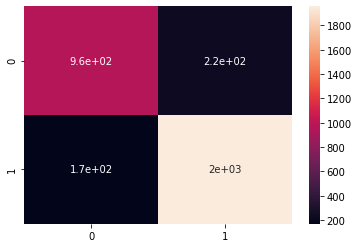

In [78]:
# Visualizando matriz de confusão com heatmap
sns.heatmap(data=cm, annot=True);

In [79]:

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1186
           1       0.90      0.92      0.91      2125

    accuracy                           0.88      3311
   macro avg       0.87      0.87      0.87      3311
weighted avg       0.88      0.88      0.88      3311




### Treinamento e avaliação com Regressão Logística

In [80]:

# Importando biblioteca
from sklearn.linear_model import LogisticRegression

In [81]:

# Fazendo o treinamento
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Avaliando o modelo

In [82]:

# Fazendo previsões
y_pred = logistic.predict(X_test)

In [83]:
# Vendo as previsões
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [84]:
# Verificando o accuracy score
accuracy_score(y_test, y_pred)

0.879492600422833

In [85]:

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 951,  235],
       [ 164, 1961]])

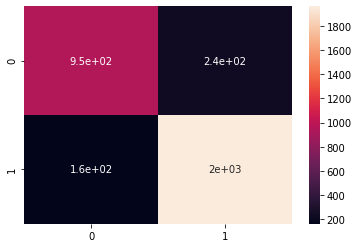

In [86]:
# Visualizando matriz de confusão com heatmap
sns.heatmap(data=cm, annot=True);

In [87]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1186
           1       0.89      0.92      0.91      2125

    accuracy                           0.88      3311
   macro avg       0.87      0.86      0.87      3311
weighted avg       0.88      0.88      0.88      3311



###<font color= 'arrow'> **Final**